<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
data= pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [ ]:
data.Type.unique()

array([1, 2, 3])

In [ ]:
data.isnull()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data[data.isnull().any(axis=1)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [ ]:
data.Proanthocyanins.isnull()

,Proanthocyanins
0,False
1,False
2,False
3,False
4,False
...,...
173,False
174,False
175,False
176,False


In [ ]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<Axes: >

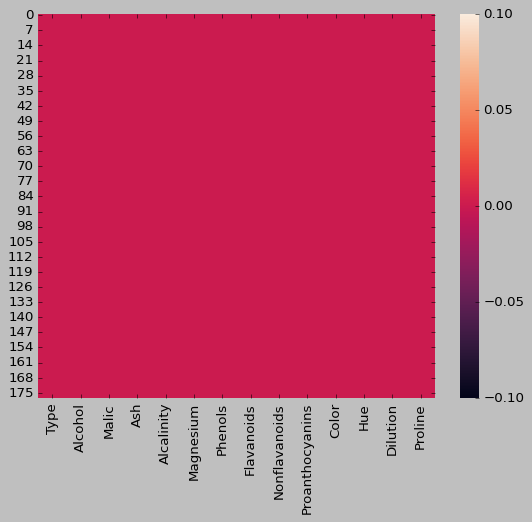

In [ ]:
sns.heatmap(data[data.columns].isnull())

[array([1., 1.]), array([3., 3.])]

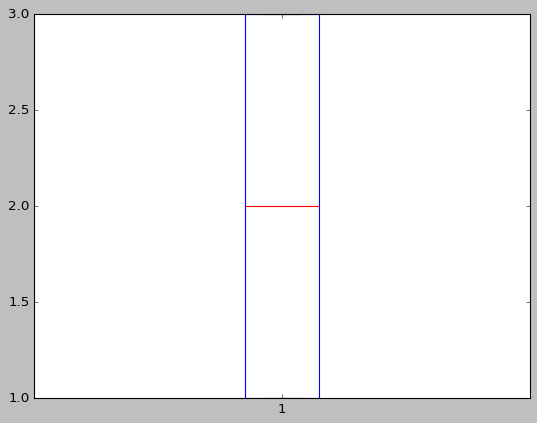

In [ ]:
box_Type=plt.boxplot(data['Type'])
[item.get_ydata() for item in box_Type['whiskers']]

[array([12.3625, 11.03  ]), array([13.6775, 14.83  ])]

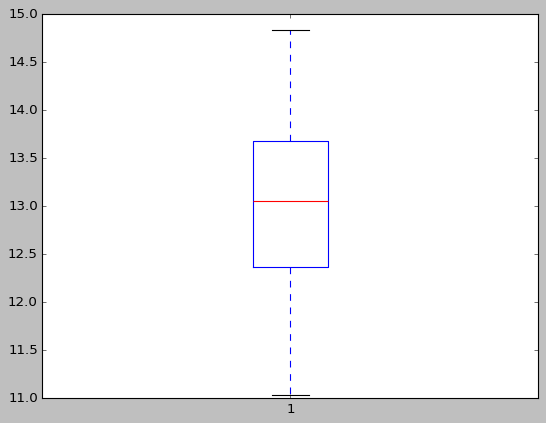

In [ ]:
box_Alcohol=plt.boxplot(data['Alcohol'])
[item.get_ydata() for item in box_Alcohol['whiskers']]

[array([1.6025, 0.74  ]), array([3.0825, 5.19  ])]

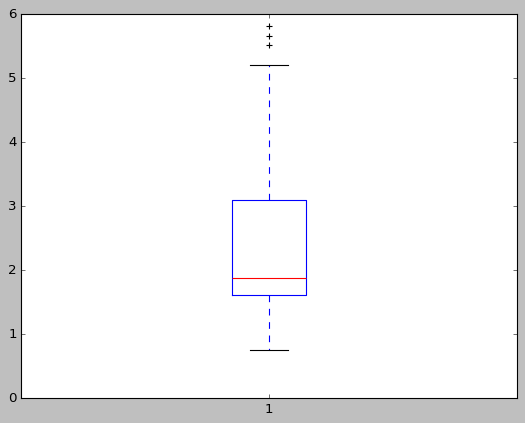

In [ ]:
box_Malic=plt.boxplot(data['Malic'])
[item.get_ydata() for item in box_Malic['whiskers']]

In [ ]:
[item.get_ydata() for item in box_Malic['fliers']]

[array([5.8 , 5.51, 5.65])]

In [ ]:
data.loc[(data.Malic>5.19,'Malic')]=5.19

In [ ]:
data.loc[(data.Malic<0.74,'Malic')]=0.74

{'whiskers': [<matplotlib.lines.Line2D at 0x7dfa5ce93f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfa5cea5390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfa5ce93710>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfa5cea6810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfa5cea70d0>],
 'means': []}

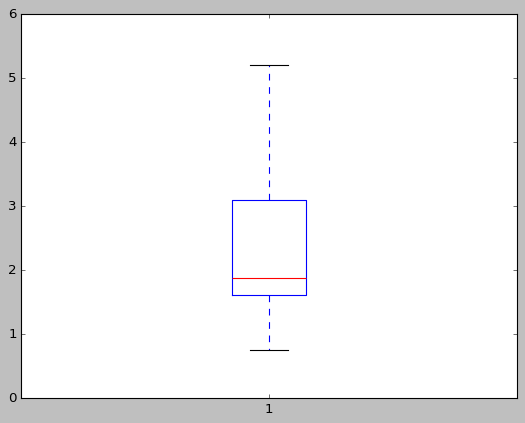

In [ ]:
plt.boxplot(data['Malic'])

[array([2.21, 1.7 ]), array([2.5575, 2.92  ])]

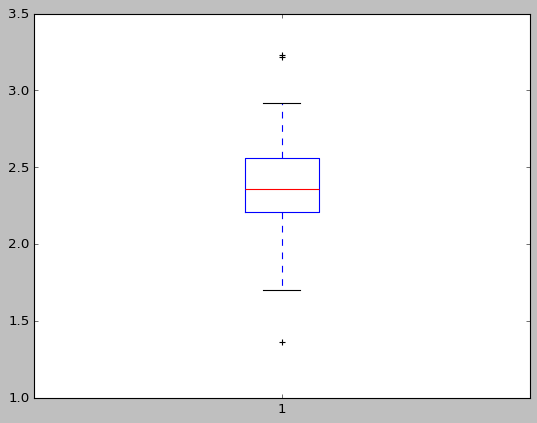

In [ ]:
box_Ash=plt.boxplot(data['Ash'])
[item.get_ydata() for item in box_Ash['whiskers']]

In [ ]:
[item.get_ydata() for item in box_Ash['fliers']]

[array([1.36, 3.22, 3.23])]

In [ ]:
data.loc[(data.Ash>2.92,'Ash')]=2.92

In [ ]:
data.loc[(data.Ash<1.7,'Ash')]=1.7

{'whiskers': [<matplotlib.lines.Line2D at 0x7dfa5cd5bdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfa5cd65110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfa5cd5b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfa5cd66250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfa5cd66b90>],
 'means': []}

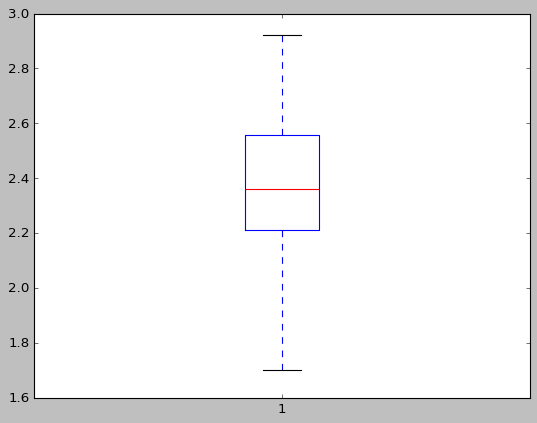

In [ ]:
plt.boxplot(data['Ash'])

[array([17.2, 11.2]), array([21.5, 27. ])]

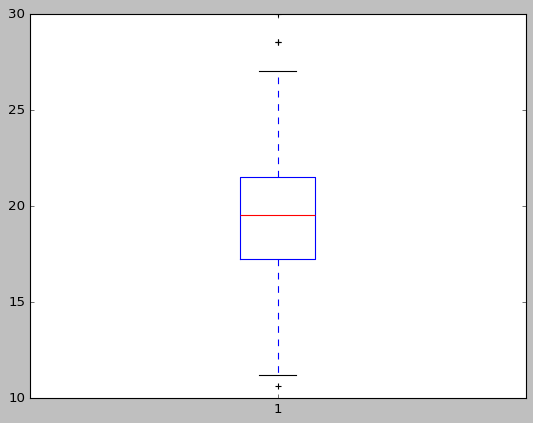

In [ ]:
box_Alcalinity=plt.boxplot(data['Alcalinity'])
[item.get_ydata() for item in box_Alcalinity['whiskers']]

In [ ]:
data.loc[(data.Alcalinity>27.,'Alcalinity')]=27.

In [ ]:
data.loc[(data.Alcalinity<11.2,'Alcalinity')]=11.2

{'whiskers': [<matplotlib.lines.Line2D at 0x7dfa5ce11ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfa5ce12dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfa5ce11210>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfa5ce28110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfa5ce28a50>],
 'means': []}

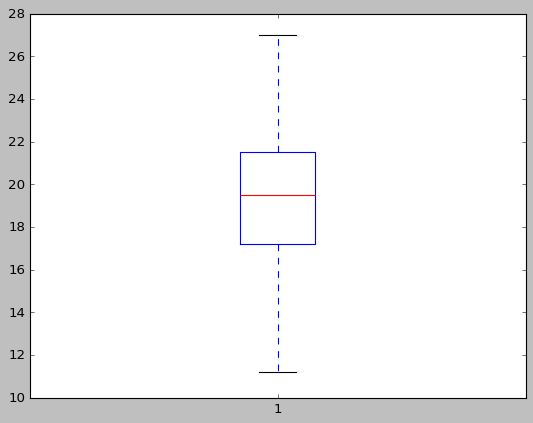

In [ ]:
plt.boxplot(data['Alcalinity'])

[array([88., 70.]), array([107., 134.])]

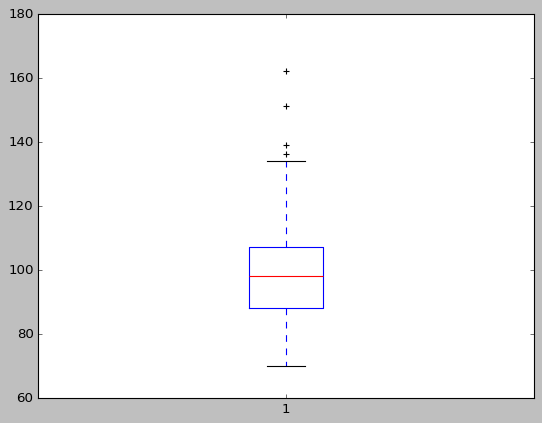

In [ ]:
box_Magnesium=plt.boxplot(data['Magnesium'])
[item.get_ydata() for item in box_Magnesium['whiskers']]


In [ ]:
data.loc[(data.Magnesium>134.,'Magnesium')]=134.


In [ ]:
data.loc[(data.Magnesium<70.,'Magnesium')]=70.



{'whiskers': [<matplotlib.lines.Line2D at 0x7dfa5ccde5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfa5ccdf910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfa5ccddcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfa5ccec790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfa5cced310>],
 'means': []}

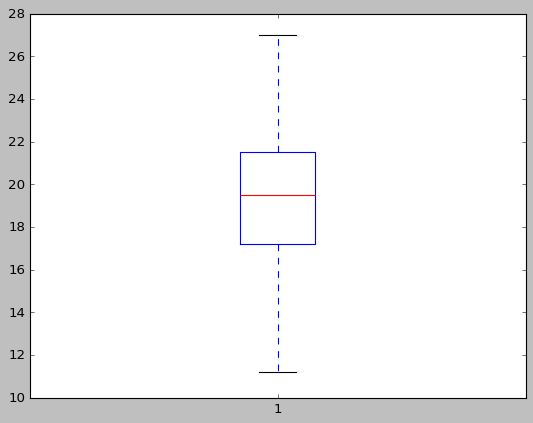

In [ ]:
plt.boxplot(data['Alcalinity'])

[array([1.7425, 0.98  ]), array([2.8 , 3.88])]

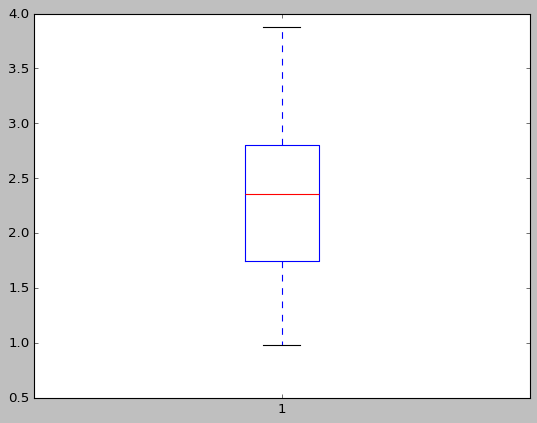

In [ ]:
box_Phenols	=plt.boxplot(data['Phenols'])
[item.get_ydata() for item in box_Phenols['whiskers']]


[array([1.205, 0.34 ]), array([2.875, 5.08 ])]

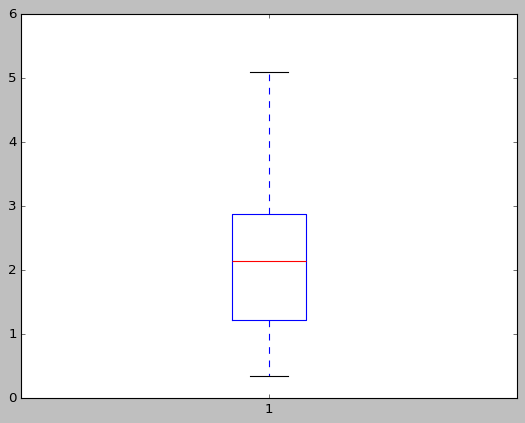

In [ ]:
box_Flavanoids	=plt.boxplot(data['Flavanoids'])
[item.get_ydata() for item in box_Flavanoids['whiskers']]


[array([0.27, 0.13]), array([0.4375, 0.66  ])]

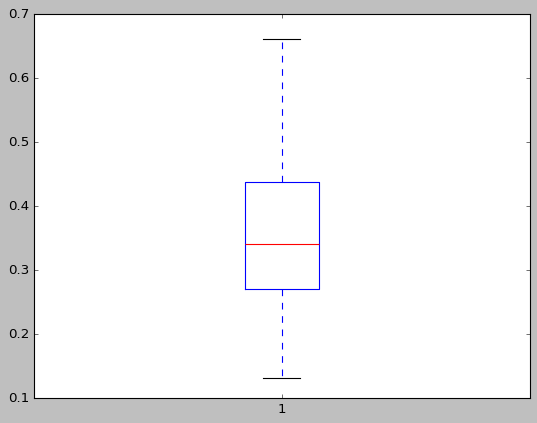

In [ ]:
box_Nonflavanoids	=plt.boxplot(data['Nonflavanoids'])
[item.get_ydata() for item in box_Nonflavanoids['whiskers']]


[array([1.25, 0.41]), array([1.95, 2.96])]

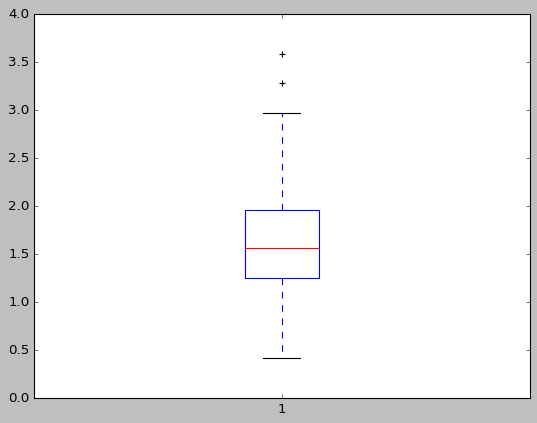

In [ ]:
box_Proanthocyanins	=plt.boxplot(data['Proanthocyanins'])
[item.get_ydata() for item in box_Proanthocyanins['whiskers']]


In [ ]:
data.loc[(data.Proanthocyanins>2.96,'Proanthocyanins')]=2.96


In [ ]:
data.loc[(data.Proanthocyanins<0.14,'Proanthocyanins')]=0.14


{'whiskers': [<matplotlib.lines.Line2D at 0x7dfa5cae4590>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfa5cae5990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfa5cadfcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfa5cae6d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfa5cae76d0>],
 'means': []}

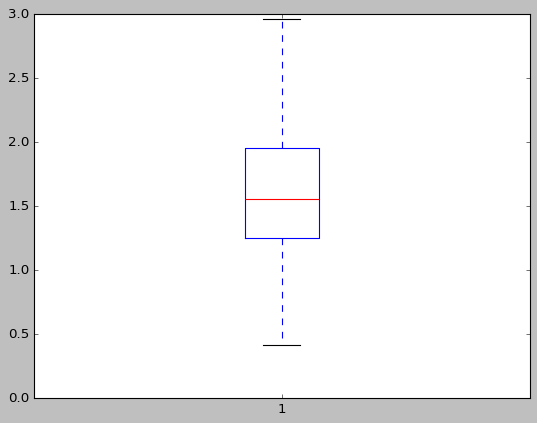

In [ ]:
plt.boxplot(data['Proanthocyanins'])

[array([3.22, 1.28]), array([ 6.2 , 10.52])]

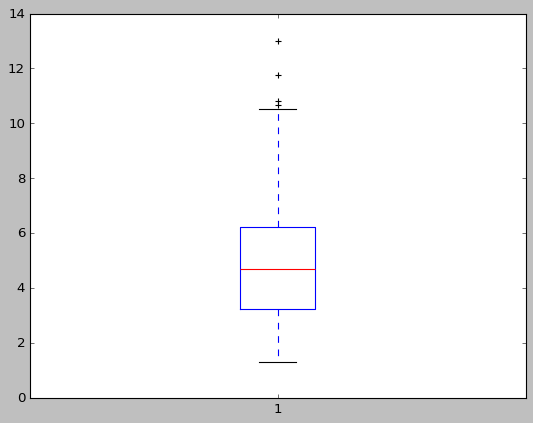

In [ ]:
box_Color	=plt.boxplot(data['Color'])
[item.get_ydata() for item in box_Color['whiskers']]


In [ ]:
data.loc[(data.Color>10.52,'Color')]=10.52


In [ ]:
data.loc[(data.Color<1.28,'Color')]=1.28


{'whiskers': [<matplotlib.lines.Line2D at 0x7dfa5c9a1110>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfa5c9a2510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfa5c9a0850>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfa5c9a3790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfa5cb92810>],
 'means': []}

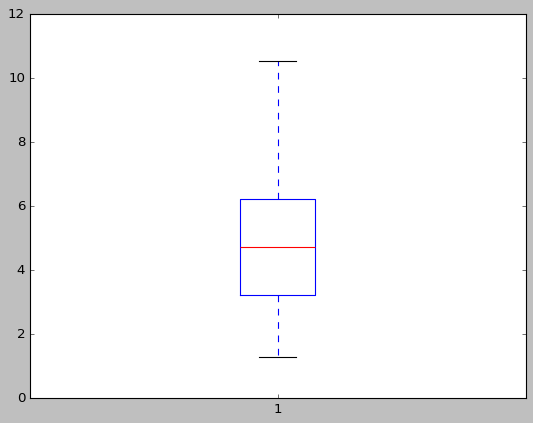

In [ ]:
plt.boxplot(data['Color'])

[array([0.7825, 0.48  ]), array([1.12, 1.45])]

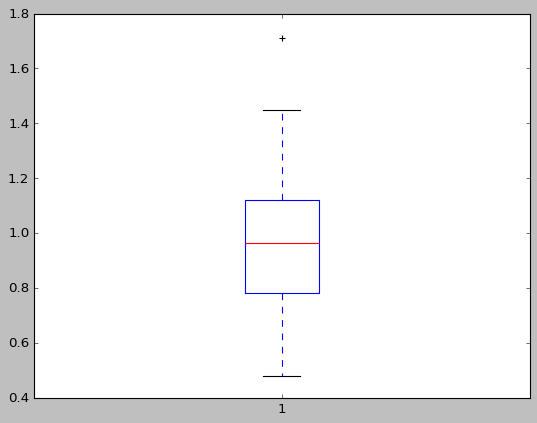

In [ ]:
box_Hue	=plt.boxplot(data['Hue'])
[item.get_ydata() for item in box_Hue['whiskers']]


In [ ]:
data.loc[(data.Hue>1.45,'Hue')]=1.45


In [ ]:
data.loc[(data.Hue<0.48,'Hue')]=0.48


{'whiskers': [<matplotlib.lines.Line2D at 0x7dfa5c865510>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfa5c866850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfa5c859750>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfa5ca29c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfa5c874290>],
 'means': []}

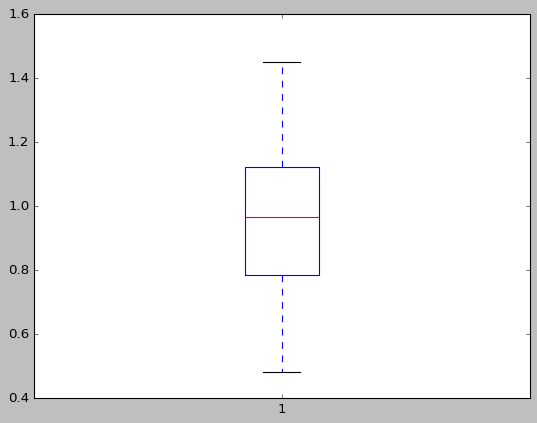

In [ ]:
plt.boxplot(data['Hue'])

[array([1.9375, 1.27  ]), array([3.17, 4.  ])]

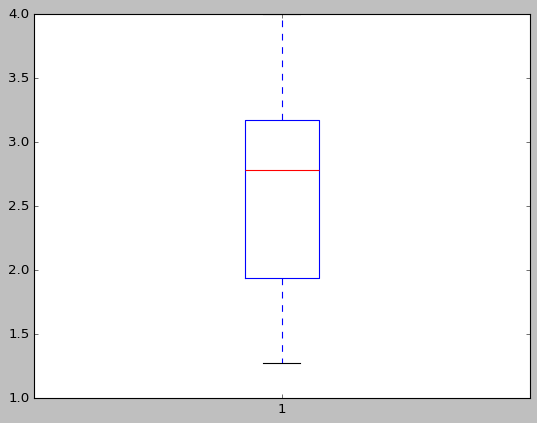

In [ ]:
box_Dilution	=plt.boxplot(data['Dilution'])
[item.get_ydata() for item in box_Dilution['whiskers']]


[array([500.5, 278. ]), array([ 985., 1680.])]

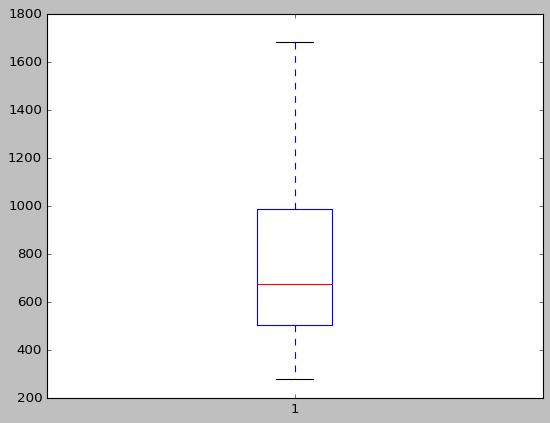

In [ ]:
box_Proline	=plt.boxplot(data['Proline'])
[item.get_ydata() for item in box_Proline['whiskers']]


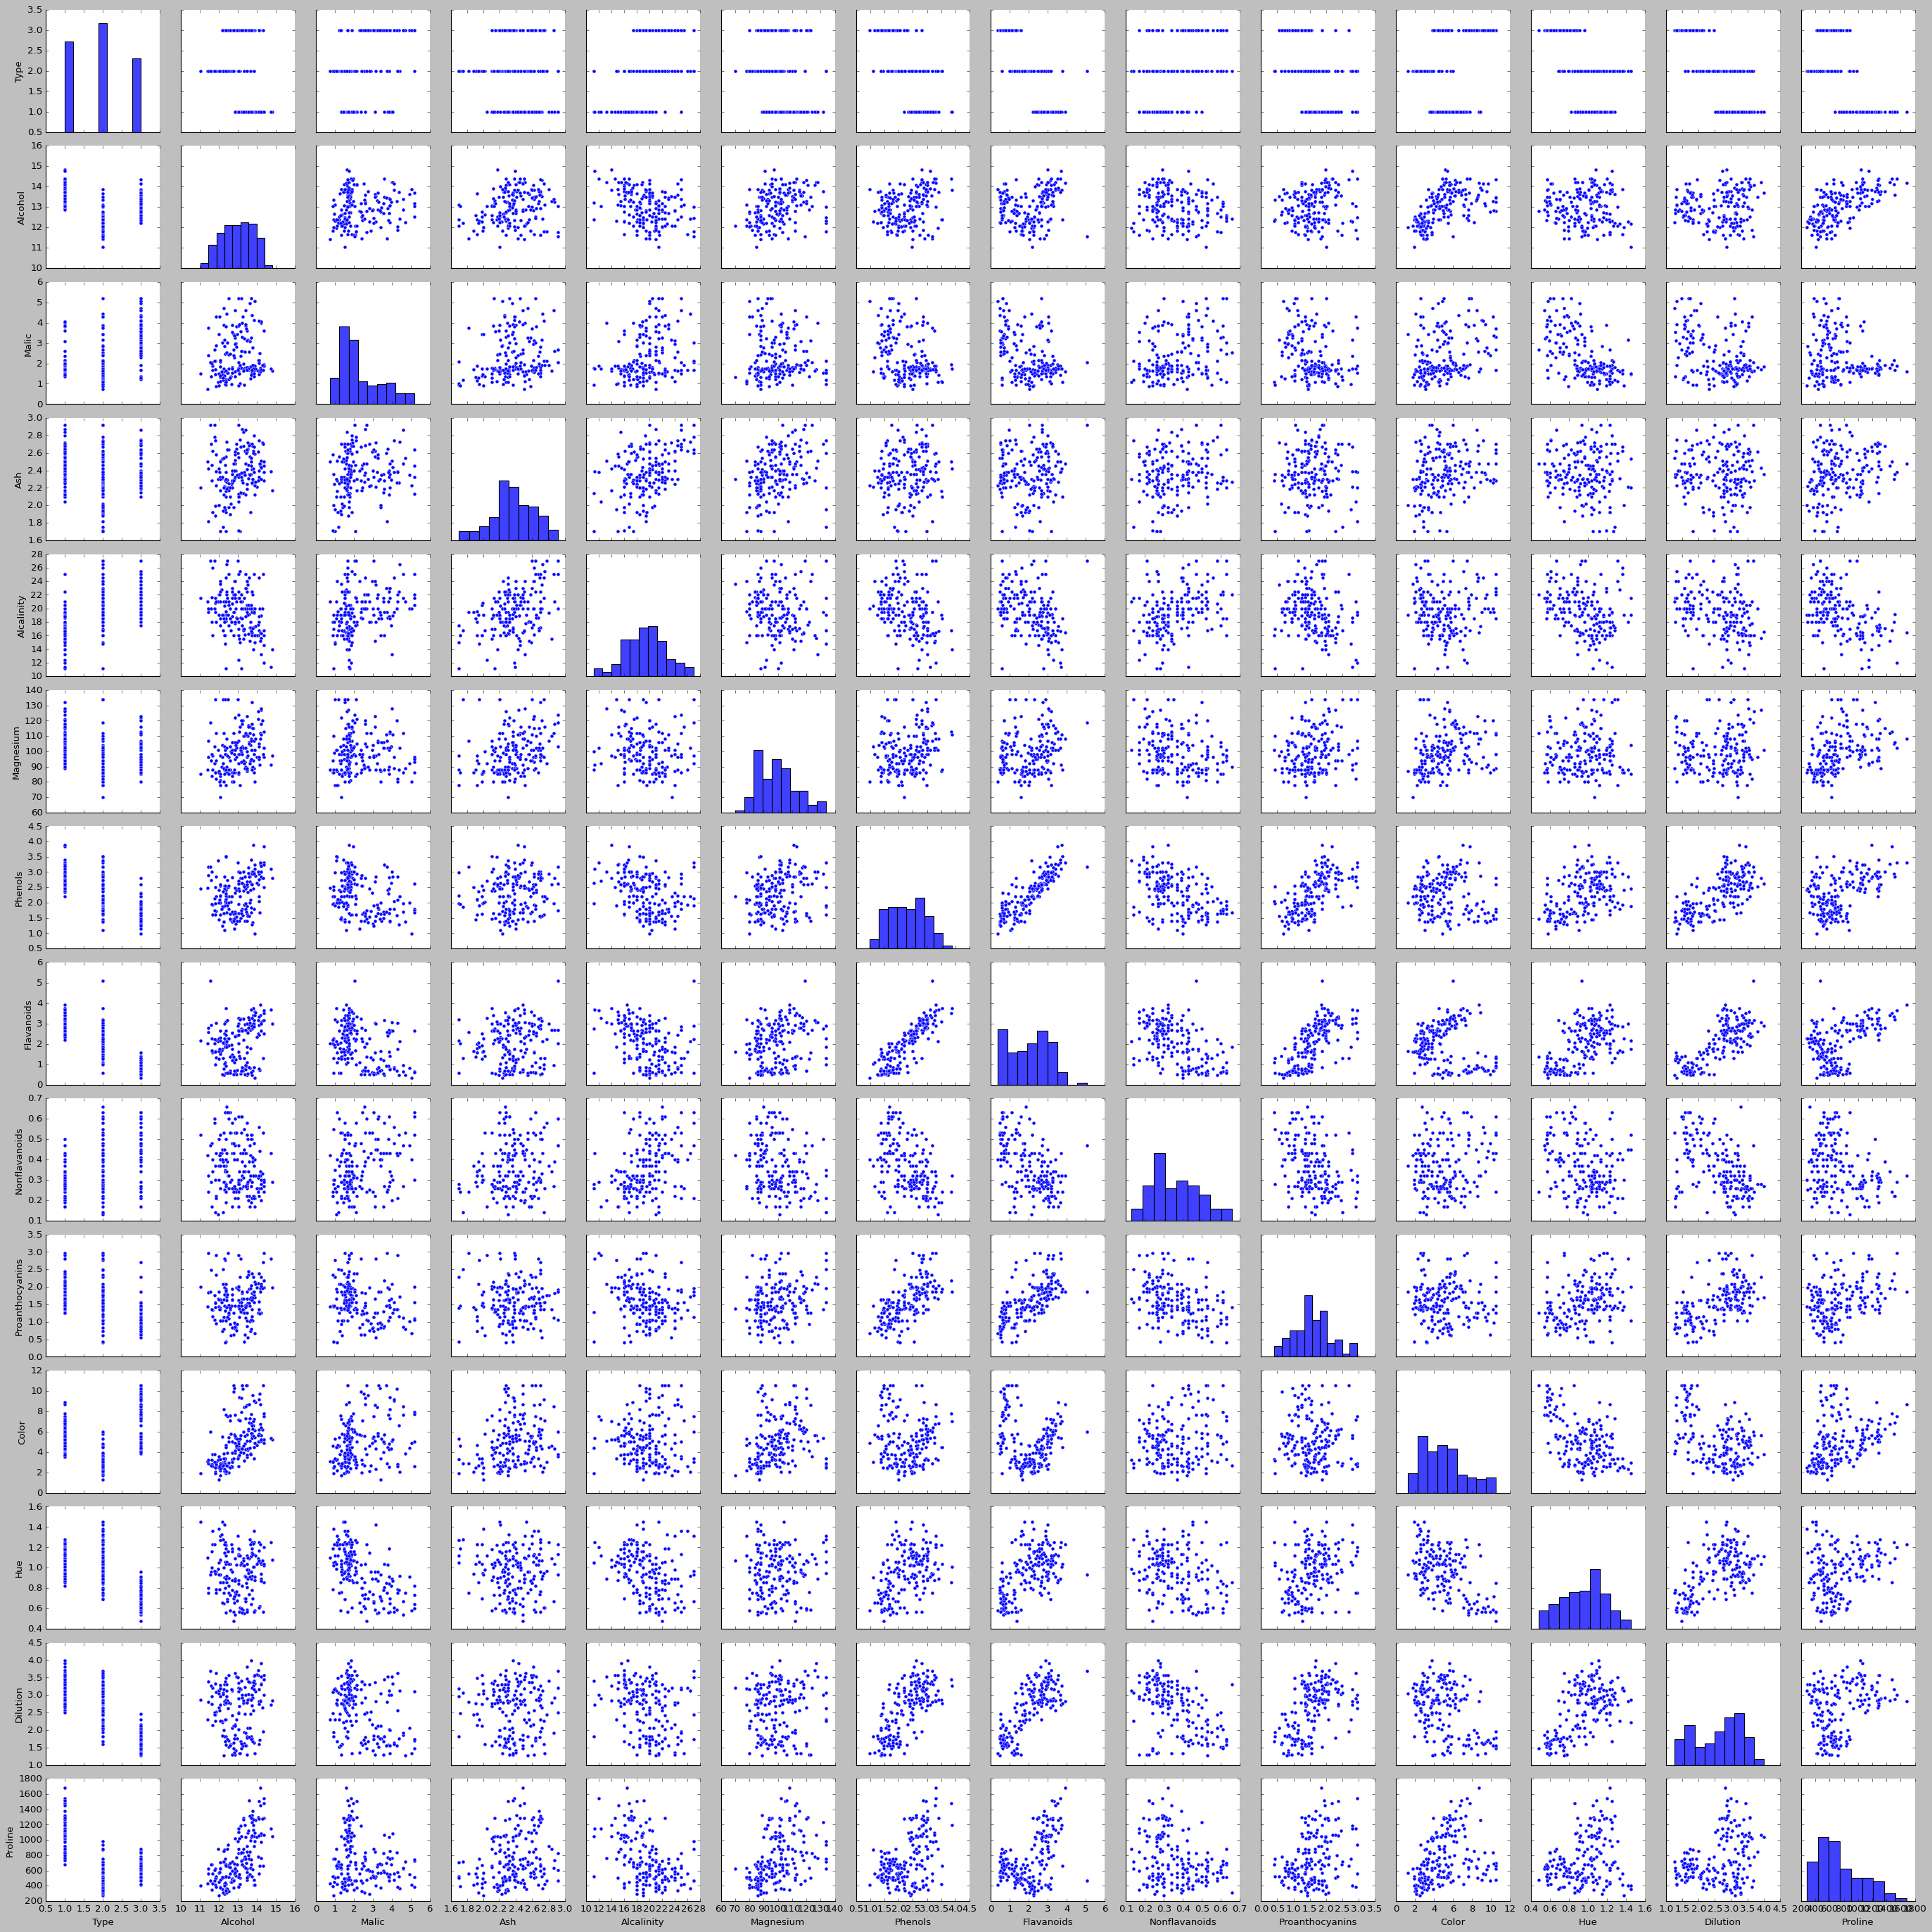

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr(method='pearson')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440823,-0.044577,0.532748,-0.225973,-0.719163,-0.847498,0.489109,-0.513632,0.259163,-0.629003,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094989,0.229745,-0.311810,0.305770,0.289101,0.236815,-0.155929,0.154517,0.550189,-0.057158,0.072343,0.643720
Malic,0.440823,0.094989,1.000000,0.171478,0.300666,-0.036551,-0.339881,-0.415500,0.293865,-0.235749,0.266922,-0.570454,-0.373239,-0.190941
Ash,-0.044577,0.229745,0.171478,1.000000,0.416034,0.321034,0.119733,0.086078,0.180686,0.002958,0.261268,-0.077433,-0.019805,0.235679
Alcalinity,0.532748,-0.311810,0.300666,0.416034,1.000000,-0.106688,-0.342739,-0.376550,0.371689,-0.216253,0.009181,-0.299021,-0.296173,-0.453938
Magnesium,-0.225973,0.305770,-0.036551,0.321034,-0.106688,1.000000,0.228183,0.210727,-0.255207,0.197485,0.244918,0.042763,0.063497,0.413507
Phenols,-0.719163,0.289101,-0.339881,0.119733,-0.342739,0.228183,1.000000,0.864564,-0.449935,0.619320,-0.061971,0.439763,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.415500,0.086078,-0.376550,0.210727,0.864564,1.000000,-0.537900,0.666412,-0.169146,0.552339,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.293865,0.180686,0.371689,-0.255207,-0.449935,-0.537900,1.000000,-0.368669,0.131260,-0.275680,-0.503270,-0.311385
Proanthocyanins,-0.513632,0.154517,-0.235749,0.002958,-0.216253,0.197485,0.619320,0.666412,-0.368669,1.000000,-0.032980,0.307045,0.531518,0.341247


Principle Component Analysis

In [ ]:
Data = data.values
Data

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
data_normal = scale(Data)

In [ ]:
pca = PCA()
pca_values = pca.fit_transform(Data)

In [ ]:
pca_values

array([[ 3.18561543e+02,  2.18910994e+01, -3.19883756e+00, ...,
         1.50978941e-01, -2.27099265e-02,  9.54650036e-02],
       [ 3.03105283e+02, -4.97218309e+00, -6.76205910e+00, ...,
         8.83436330e-02, -5.70099206e-02,  2.01933380e-02],
       [ 4.38069352e+02, -6.09811897e+00,  1.07387849e+00, ...,
         1.89746794e-01, -5.07176207e-02, -3.91645822e-02],
       ...,
       [ 8.84549869e+01,  1.91456902e+01,  2.49762652e+00, ...,
        -2.08596818e-01,  9.27724289e-02,  3.36680372e-02],
       [ 9.34531273e+01,  1.90302770e+01,  2.01100792e+00, ...,
        -2.36788558e-02, -3.90041189e-02,  1.40507157e-01],
       [-1.86939295e+02,  5.75961799e-02,  5.80931429e+00, ...,
         3.15563805e-02,  2.97921390e-02,  1.77372602e-02]])

In [ ]:
pca = PCA(n_components = 14)
pca_values = pca.fit_transform(data_normal)

In [ ]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.39958197, 0.18272683, 0.09931014, 0.06634922, 0.05954028,
       0.04720795, 0.03736843, 0.02565953, 0.02123394, 0.01860985,
       0.01642335, 0.01230573, 0.00961459, 0.00406819])

In [ ]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.96, 58.23, 68.16, 74.79, 80.74, 85.46, 89.2 , 91.77, 93.89,
       95.75, 97.39, 98.62, 99.58, 99.99])

In [ ]:
pca.components_

array([[ 0.39180159, -0.13785155,  0.22322276,  0.00096464,  0.23302508,
        -0.12502517, -0.3573502 , -0.38891272,  0.26524575, -0.2816683 ,
         0.08613283, -0.27938828, -0.34824935, -0.26893913],
       [ 0.00459677,  0.47611644,  0.22585907,  0.32350449, -0.01650929,
         0.32777972,  0.06106668, -0.00555412,  0.02537801,  0.03128973,
         0.52404482, -0.26693778, -0.16498931,  0.36253156],
       [-0.00869126, -0.19996933,  0.09027006,  0.62943283,  0.60632623,
         0.12844546,  0.15148207,  0.14700705,  0.17280437,  0.14482512,
        -0.15756985,  0.08722488,  0.16916493, -0.12258001],
       [ 0.11081238, -0.04519511,  0.47336269, -0.24382799,  0.08832643,
        -0.2398733 ,  0.20793059,  0.16226454, -0.26986863,  0.46286473,
         0.09690319, -0.43302266,  0.16838178, -0.23435851],
       [ 0.15104128, -0.26826065, -0.11739174, -0.08546273,  0.05912797,
         0.72609419, -0.11673273, -0.07541846, -0.54309191,  0.03413161,
        -0.05475224, -0.09

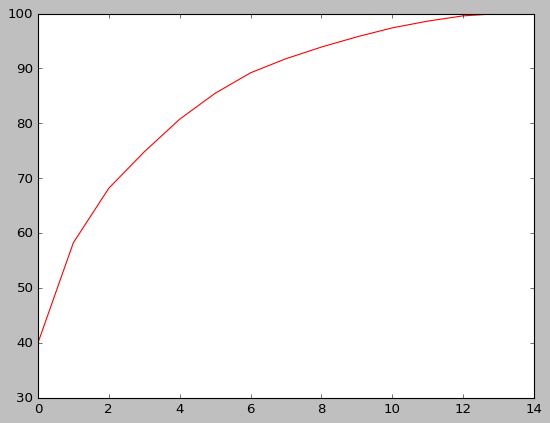

In [ ]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")

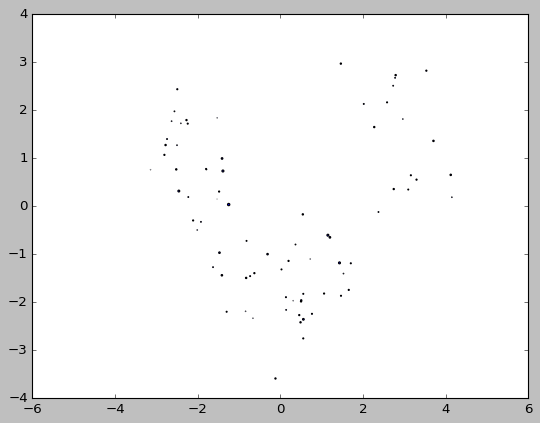

In [ ]:
# plot between PCA1 and PCA2 and PCA3
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
a = pca_values[:,3:4]
b = pca_values[:,4:5]
c = pca_values[:,5:6]
e = pca_values[:,6:7]
plt.scatter(x,y,z)

In [ ]:
finalDf = pd.DataFrame(pca_values[:,0:7],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [ ]:
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-3.570267,1.540255,-0.121464,-0.097086,0.757749,0.225070,0.702422
1,-2.564503,-0.333610,-2.051766,-0.451633,-0.188748,0.964552,0.036015
2,-2.804468,1.056024,1.049655,0.741635,-0.417658,-0.473155,0.425930
3,-3.942180,2.801495,-0.137987,0.653634,-0.231556,-0.268748,-0.393382
4,-1.409332,0.980983,2.154095,-0.502659,0.275820,0.553942,0.502120
...,...,...,...,...,...,...,...
173,3.561311,2.150857,-0.383702,0.687323,-0.904430,1.002475,0.563817
174,2.963467,1.802171,0.216962,0.430009,0.142073,0.019663,0.105166
175,3.024550,2.868502,-0.999741,0.542942,1.125346,-0.096996,0.899023
176,2.743247,2.400300,-0.586436,-0.442872,0.870086,-1.140093,0.917900


##k-means for Original  data

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm = norm_func(data)
df_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.217978,0.598361,0.278481,0.890625,0.627586,0.573840,0.283019,0.737255,0.471861,0.577320,0.970696,0.561341
1,0.0,0.571053,0.233708,0.360656,0.000000,0.468750,0.575862,0.510549,0.245283,0.341176,0.335498,0.587629,0.780220,0.550642
2,0.0,0.560526,0.364045,0.795082,0.468354,0.484375,0.627586,0.611814,0.320755,0.941176,0.476190,0.567010,0.695971,0.646933
3,0.0,0.878947,0.271910,0.655738,0.354430,0.671875,0.989655,0.664557,0.207547,0.694118,0.705628,0.391753,0.798535,0.857347
4,0.0,0.581579,0.415730,0.959016,0.620253,0.750000,0.627586,0.495781,0.490566,0.552941,0.329004,0.577320,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,1.000000,0.614754,0.588608,0.390625,0.241379,0.056962,0.735849,0.254902,0.694805,0.164948,0.172161,0.329529
174,1.0,0.623684,0.712360,0.639344,0.746835,0.500000,0.282759,0.086498,0.566038,0.392157,0.651515,0.226804,0.106227,0.336662
175,1.0,0.589474,0.795506,0.459016,0.556962,0.781250,0.210345,0.073840,0.566038,0.368627,0.965368,0.113402,0.106227,0.397290
176,1.0,0.563158,0.415730,0.549180,0.556962,0.781250,0.231034,0.071730,0.754717,0.411765,0.867965,0.123711,0.128205,0.400856


<function matplotlib.pyplot.show(close=None, block=None)>

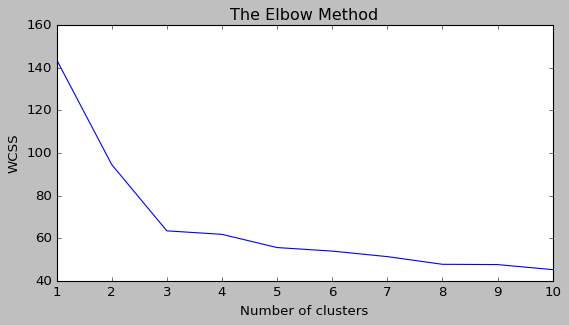

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(df_norm)
  WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show

In [ ]:
model=KMeans(n_clusters=7).fit(df_norm)
model.inertia_

52.38691028742486

In [ ]:
clf=KMeans(n_clusters=7)
clf.fit(df_norm)


KMeans(n_clusters=7)

In [ ]:
y_names=clf.predict(df_norm)
y_names

array([0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 6, 6, 0, 6, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 0, 6,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 3, 3, 3, 3, 3, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 6, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 5,
       5, 5, 5, 5, 4, 4, 5, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[0.        , 0.76494058, 0.25784705, 0.53781068, 0.29175174,
        0.56502016, 0.69655172, 0.60119777, 0.25258673, 0.67843137,
        0.52845273, 0.57864982, 0.71593997, 0.63213842],
       [0.5       , 0.30833333, 0.33713216, 0.57162373, 0.65747438,
        0.33258929, 0.40394089, 0.37266426, 0.52201258, 0.48011204,
        0.1780303 , 0.54408444, 0.55878249, 0.1487331 ],
       [1.        , 0.53237986, 0.5727406 , 0.6336422 , 0.65189873,
        0.52581522, 0.19955022, 0.10777839, 0.45693191, 0.22148338,
        0.52046866, 0.24518153, 0.16133142, 0.23432364],
       [0.5       , 0.35234962, 0.16155698, 0.24941452, 0.41636528,
        0.40904018, 0.48374384, 0.35307414, 0.32951482, 0.45840336,
        0.22074057, 0.65022091, 0.54016222, 0.19568983],
       [1.        , 0.75789474, 0.21011236, 0.79508197, 0.7943038 ,
        0.3671875 , 0.59310345, 0.18248945, 0.74528302, 0.81764706,
        1.        , 0.09278351, 0.21978022, 0.25820257],
       [1.        , 0.5680778 , 0.6

In [ ]:
clf.labels_

array([0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 6, 6, 0, 6, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 0, 6,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 3, 3, 3, 3, 3, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 6, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 5,
       5, 5, 5, 5, 4, 4, 5, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [ ]:
clf.inertia_

52.91424627274296

In [ ]:
md=pd.Series(y_names)
df_norm['clust']=md
df_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,0.0,0.842105,0.217978,0.598361,0.278481,0.890625,0.627586,0.573840,0.283019,0.737255,0.471861,0.577320,0.970696,0.561341,0
1,0.0,0.571053,0.233708,0.360656,0.000000,0.468750,0.575862,0.510549,0.245283,0.341176,0.335498,0.587629,0.780220,0.550642,0
2,0.0,0.560526,0.364045,0.795082,0.468354,0.484375,0.627586,0.611814,0.320755,0.941176,0.476190,0.567010,0.695971,0.646933,0
3,0.0,0.878947,0.271910,0.655738,0.354430,0.671875,0.989655,0.664557,0.207547,0.694118,0.705628,0.391753,0.798535,0.857347,0
4,0.0,0.581579,0.415730,0.959016,0.620253,0.750000,0.627586,0.495781,0.490566,0.552941,0.329004,0.577320,0.608059,0.325963,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,1.000000,0.614754,0.588608,0.390625,0.241379,0.056962,0.735849,0.254902,0.694805,0.164948,0.172161,0.329529,5
174,1.0,0.623684,0.712360,0.639344,0.746835,0.500000,0.282759,0.086498,0.566038,0.392157,0.651515,0.226804,0.106227,0.336662,5
175,1.0,0.589474,0.795506,0.459016,0.556962,0.781250,0.210345,0.073840,0.566038,0.368627,0.965368,0.113402,0.106227,0.397290,5
176,1.0,0.563158,0.415730,0.549180,0.556962,0.781250,0.231034,0.071730,0.754717,0.411765,0.867965,0.123711,0.128205,0.400856,5


In [ ]:
plt.style.use('classic')

In [ ]:
df_norm.iloc[:,0:].groupby(df_norm.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
clust,,,,,,,,,,,,,,,
0,0.000000,0.764941,0.257847,0.537811,0.291752,0.565020,0.696552,0.601198,0.252587,0.678431,0.528453,0.578650,0.715940,0.632138,0.0
1,0.500000,0.308333,0.337132,0.571624,0.657474,0.332589,0.403941,0.372664,0.522013,0.480112,0.178030,0.544084,0.558782,0.148733,1.0
2,1.000000,0.532380,0.572741,0.633642,0.651899,0.525815,0.199550,0.107778,0.456932,0.221483,0.520469,0.245182,0.161331,0.234324,2.0
3,0.500000,0.352350,0.161557,0.249415,0.416365,0.409040,0.483744,0.353074,0.329515,0.458403,0.220741,0.650221,0.540162,0.195690,3.0
4,1.000000,0.757895,0.210112,0.795082,0.794304,0.367188,0.593103,0.182489,0.745283,0.817647,1.000000,0.092784,0.219780,0.258203,4.0
5,1.000000,0.568078,0.617782,0.558090,0.628509,0.398098,0.251724,0.070721,0.728466,0.315942,0.754470,0.182878,0.135690,0.267041,5.0
6,0.017241,0.653539,0.312515,0.702092,0.474247,0.585668,0.587990,0.510039,0.349382,0.483976,0.378228,0.631710,0.669698,0.557283,6.0


In [ ]:
plt.style.use('classic')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='Malic', ylabel='Alcohol'>

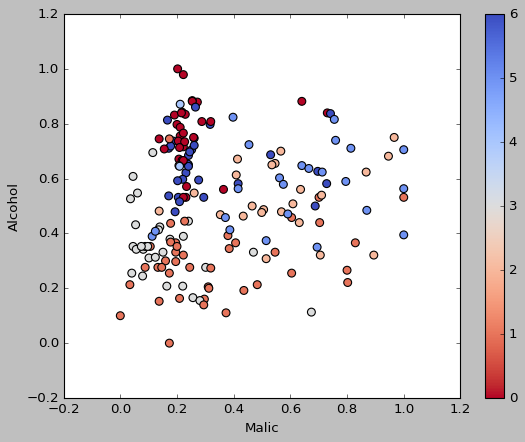

In [ ]:
df_norm.plot("Malic","Alcohol",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [ ]:
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(df_norm, clf.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5440198827754308


# Clustering on PCA data using K-Means

<function matplotlib.pyplot.show(close=None, block=None)>

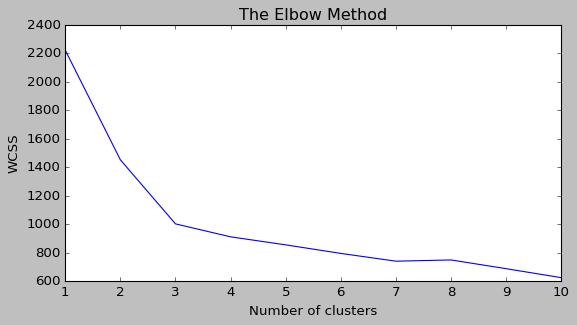

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(finalDf)
  WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show

In [ ]:
model=KMeans(n_clusters=7).fit(finalDf)
model.inertia_

733.5560700542733

In [ ]:
clf=KMeans(n_clusters=7)
clf.fit(finalDf)


KMeans(n_clusters=7)

In [ ]:
y_names=clf.predict(finalDf)
y_names

array([3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 5, 6,
       1, 1, 0, 6, 0, 4, 1, 4, 6, 0, 1, 0, 6, 4, 1, 1, 5, 2, 6, 1, 5, 5,
       5, 5, 5, 5, 5, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 6,
       6, 1, 5, 5, 5, 5, 1, 6, 0, 1, 6, 4, 4, 1, 6, 1, 1, 5, 5, 5, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[ 1.36663325, -1.14414669, -1.42057229, -1.28914782,  0.29555225,
         0.08721751,  0.27854527],
       [-0.36369333, -2.10301301, -0.4122358 ,  0.63490133,  0.00532226,
        -0.08818907, -0.28243483],
       [ 3.10505773,  1.28404131, -0.141148  ,  0.15461301,  0.02408016,
        -0.07940899, -0.06367782],
       [-2.66454306,  1.0116015 , -0.2545308 , -0.15479644, -0.24054193,
         0.21273312, -0.03648735],
       [-1.0768618 , -0.03694108,  2.60868885,  0.18671572,  0.33702957,
         0.40312308,  0.12231404],
       [ 0.96428577, -1.95956116,  1.12820258, -0.583995  , -0.64151611,
        -0.26214633,  0.08794668],
       [-0.92020754, -1.18067037,  0.50457911,  0.6744304 ,  1.48334838,
        -0.4461383 ,  0.56282538]])

In [ ]:
clf.labels_

array([3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 5, 6,
       1, 1, 0, 6, 0, 4, 1, 4, 6, 0, 1, 0, 6, 4, 1, 1, 5, 2, 6, 1, 5, 5,
       5, 5, 5, 5, 5, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 6,
       6, 1, 5, 5, 5, 5, 1, 6, 0, 1, 6, 4, 4, 1, 6, 1, 1, 5, 5, 5, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
clf.inertia_

753.201779363237

In [ ]:
md=pd.Series(y_names)
finalDf['clust']=md
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,clust
0,-3.570267,1.540255,-0.121464,-0.097086,0.757749,0.225070,0.702422,3
1,-2.564503,-0.333610,-2.051766,-0.451633,-0.188748,0.964552,0.036015,3
2,-2.804468,1.056024,1.049655,0.741635,-0.417658,-0.473155,0.425930,3
3,-3.942180,2.801495,-0.137987,0.653634,-0.231556,-0.268748,-0.393382,3
4,-1.409332,0.980983,2.154095,-0.502659,0.275820,0.553942,0.502120,4
...,...,...,...,...,...,...,...,...
173,3.561311,2.150857,-0.383702,0.687323,-0.904430,1.002475,0.563817,2
174,2.963467,1.802171,0.216962,0.430009,0.142073,0.019663,0.105166,2
175,3.024550,2.868502,-0.999741,0.542942,1.125346,-0.096996,0.899023,2
176,2.743247,2.400300,-0.586436,-0.442872,0.870086,-1.140093,0.917900,2


In [ ]:
finalDf.iloc[:,0:].groupby(finalDf.clust).mean()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,clust
clust,,,,,,,,
0,1.366633,-1.144147,-1.420572,-1.289148,0.295552,0.087218,0.278545,0.0
1,-0.363693,-2.103013,-0.412236,0.634901,0.005322,-0.088189,-0.282435,1.0
2,3.105058,1.284041,-0.141148,0.154613,0.024080,-0.079409,-0.063678,2.0
3,-2.664543,1.011601,-0.254531,-0.154796,-0.240542,0.212733,-0.036487,3.0
4,-1.076862,-0.036941,2.608689,0.186716,0.337030,0.403123,0.122314,4.0
5,0.964286,-1.959561,1.128203,-0.583995,-0.641516,-0.262146,0.087947,5.0
6,-0.920208,-1.180670,0.504579,0.674430,1.483348,-0.446138,0.562825,6.0


In [ ]:
plt.style.use('classic')

<Axes: xlabel='pc1', ylabel='pc2'>

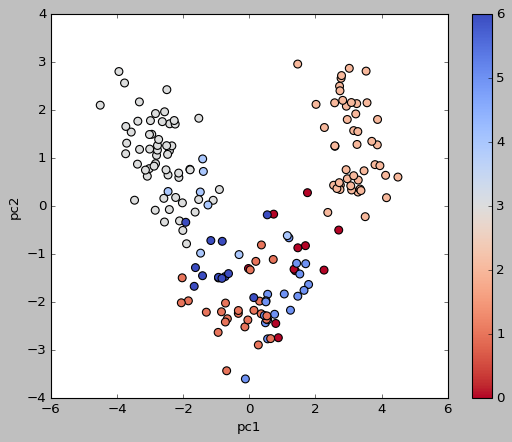

In [ ]:
finalDf.plot("pc1","pc2",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

Comparison and Analysis:-
 1.comparing both the original data has more dimensions than pca data as the dimensions are reduced, original data is Easier to interpret clusters using raw features whereas pca is Harder to interpret principal components
 Here are the responses:

2. Similarities and Differences in Clustering Results
The clustering results obtained from applying PCA and clustering directly on the original dataset show both similarities and differences. Similarities include:
- The clusters obtained after applying PCA are more compact and well-separated compared to those obtained from clustering the original dataset.
- PCA-based clustering results in a more balanced distribution of data points within clusters.

3. Impact of Dimensionality Reduction on Clustering Performance
Dimensionality reduction using PCA has a significant impact on clustering performance:

- Improved cluster quality: By reducing the noise and irrelevant features, PCA helps in identifying more cohesive and meaningful clusters.
- Enhanced interpretability: Lower-dimensional data facilitates easier visualization and understanding of cluster characteristics.
- Reduced computational complexity: Clustering on lower-dimensional data reduces computational overhead, making the process more efficient.

4. Trade-offs between PCA and Clustering on Original Dataset
When deciding between using PCA and clustering directly on the original dataset, consider the following trade-offs:

- Information loss vs. noise reduction: PCA reduces noise and irrelevant features but may also lose important information. Clustering on the original dataset retains all information but may be affected by noise.
- Computational efficiency vs. accuracy: PCA-based clustering is computationally efficient but may sacrifice some accuracy. Clustering on the original dataset can be computationally expensive but may provide more accurate results.




##Conclusion and Insights:-
###We use PCA  when there are many dimensions and we reduce the dimensions to cover the more data in lesser pca components, using kmeans we cluster the data using the centroids and assigning them to the nearest centroids
###as of with the original data k means is working on cluster seven with silhouette score above fifty percent,PCA + Clustering can improve cluster quality and efficiency, but it’s essential to balance information retention and dimensionality reduction.